<a href="https://colab.research.google.com/github/shinasto/scikit-learn/blob/main/8_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

럭키백의 확률 구하기

*   생선의 5가지 특성과 7개의 종류가 주어 졌을때
*   럭키백의 생선이 어떤 타깃에 속하는지 확률을 구해보자.


K-최근접 이웃 모델과 로지스틱 회귀 모델을 사용해보자.

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

# 처음 5개 행을 출력
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
# 데이터데이터 열을 선택하는 방법은 원하는 열을 리스트로 나열하면 된다.
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# k-최근접 이웃 분류기의 확률 예측

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

# 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 "다중 분류" 라고 부른다.

0.8907563025210085
0.85


In [ ]:
# KneighborsClassifier에서 정렬된 타깃값은 classes_속성에 저장
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# predict() 메서드는 친절하게도 타깃값으로 예측을 출력
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
# 사이킷런 분류 모델은 predict_proba() 메서드로 클래스별 확률값을 반환
import numpy as np
proba = kn.predict_proba(test_scaled[:5])

print(kn.classes_)
print(np.round(proba, decimals=4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
[['Roach' 'Perch' 'Perch']]


In [ ]:
# 네 번째 샘플의 최근접 이웃 클래스 확인
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

# k-최근접의 확률은 0/3, 1/3, 2/3, 3/3이 전부임.
# 좀더 좋은 접근 방법을 찾아야함.

[['Roach' 'Perch' 'Perch']]


로지스틱 회귀 (Logistic regression)
* 이름은 회귀지만 분류 모델입니다.
* 선형 회귀와 동일하게 선형 방정식을 학습합니다.


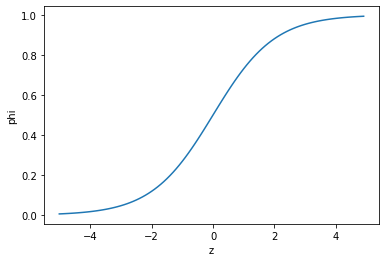

In [ ]:
# 확률이 되려면 0~1 (0~100%) 사이 값이 되어야 합니다.
# z가 아주 큰 음수일 때 0이 되고, z가 아주 큰 양수일 때 1이 되도록 바꾸는 방법은?
# 시그모이드 함수(sigmoid function)를 사용하면 가능

import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
# 넘파일 배열은 True, False 값을 전달하여 행을 선택할 수 있음 (불리언 인덱싱)
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
# 도미(bream)와 빙어(smelt)의 해만 추출

bream_smelt_indexes = (train_target == 'Bream') | (train_target=='Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
# 로지스특 회귀 모델로 학습
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
# 확률 출력
print(lr.classes_)
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
# 계수 및 절편 출력
# z = a*weight + b*length + c*diagonal + d*height + e*width + f
print(lr.coef_, lr.intercept_)
# z값을 출력
decision = lr.decision_function(train_bream_smelt[:5])
print(decision)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]
[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
# z 값을 시그모이드 함수에 통과시비면 확률을 얻르 수 있음
# 파이썬의 사이파이라이브러리에도 시그모이드 함수 가 있습니다.
from scipy.special import expit
print(expit(decision))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
# 로지스틱 회귀로 다중 분류 수행하기

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
print(lr.classes_)
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
# 다중 분류는 클래스마다 z값을 하나씩 계산합니다. 당연히 가장 높은 z값을 출려하는 클래스가 예측 클래스가 됩니다.
# 확률은 어떻게 계산한 것일까요?
# 다중 분류는 소프트맥스 함수를 사용하여 7개의 z값을 확률로 변환합니다.
# 소프트 맥스는 어려 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 만듭니다.
# z 값을 모두 더해 각 z를 더한 값을 나눠주면 됩니다.
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
